# HR Analytics Project

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [49]:
# Let's import basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Importing dataset
df_hr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


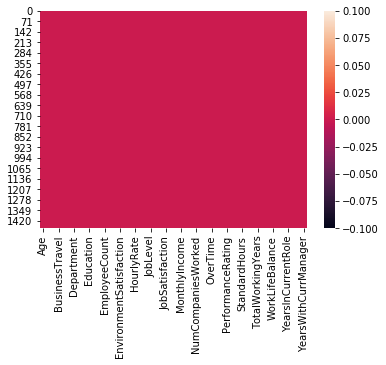

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
# Checking for  null values
sns.heatmap(df_hr.isnull())
plt.show()
df_hr.isnull().sum()
#No null values

In [52]:
df_hr.shape
# This dataset contains 1470 Rows and 35 Columns.

(1470, 35)

In [53]:
#lets chcek the datatypes
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [54]:
# Let's drop unnecessary columns
# Checking for Employee Number
df_hr["EmployeeNumber"].value_counts()

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [55]:
# We can drop this feature as all are unique id's
df_hr.drop("EmployeeNumber",axis=1,inplace=True)

#df_hr["Over18"] and df_hr["StandardHours"] also need to be checked

In [56]:
df_hr["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [57]:
# This can be dropped as Value is same for all "Y"
df_hr.drop("Over18",axis=1,inplace=True)

In [58]:
df_hr["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [59]:
# This can also be be dropped as Value is same for all "80"
df_hr.drop("StandardHours",axis=1,inplace=True)

In [60]:
# Let's see the shape again
df_hr.shape

(1470, 32)

In [61]:
# Here our Label is 'attrition' so let's understand it:
df_hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

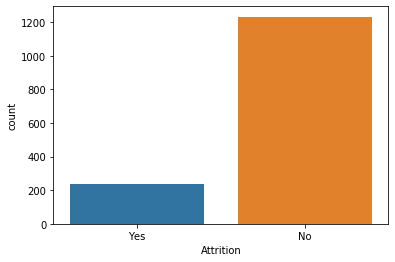

Attrition percentage is: 16.122448979591837


In [62]:
sns.countplot(x="Attrition",data=df_hr)
plt.show()
# This see Overall Attrition percentage in the data given:
print("Attrition percentage is:",237/(1233+237)*100)

In [63]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

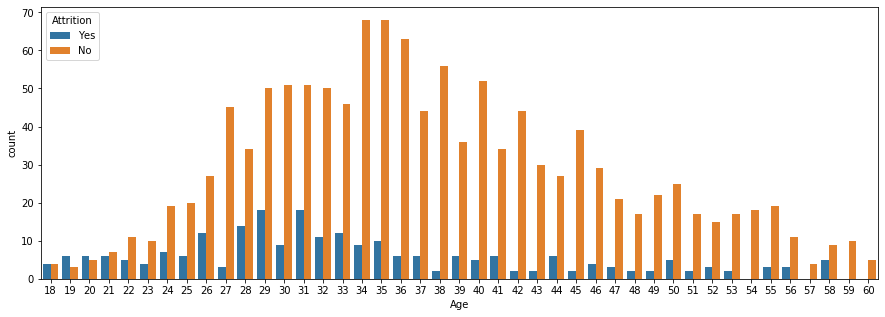

In [64]:
# Let's understand the features:
# Age
plt.figure(figsize=(15,5))
sns.countplot(df_hr.Age,hue=df_hr.Attrition)

#Looking at the Blue bars, we can see that the higher aged people have less attrition rates. Let's re-confirm with boxplots

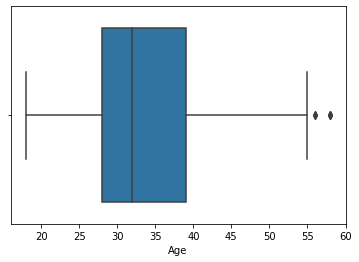

In [65]:
sns.boxplot(df_hr.Age[df_hr.Attrition=='Yes'])

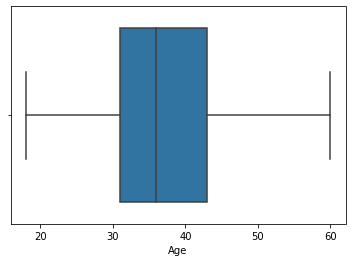

In [66]:
sns.boxplot(df_hr.Age[df_hr.Attrition=='No'])

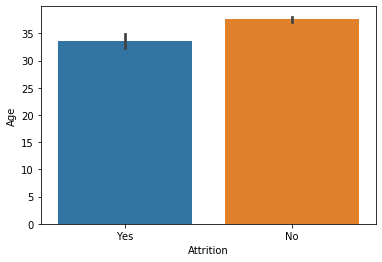

In [67]:
# By Looking at the above 2 boxplots we can say that mostly older people are staying. Let's see mean
sns.barplot(x="Attrition",y="Age",data=df_hr)
plt.show()
# This also proves that average age of people leaving is less than the ones staying

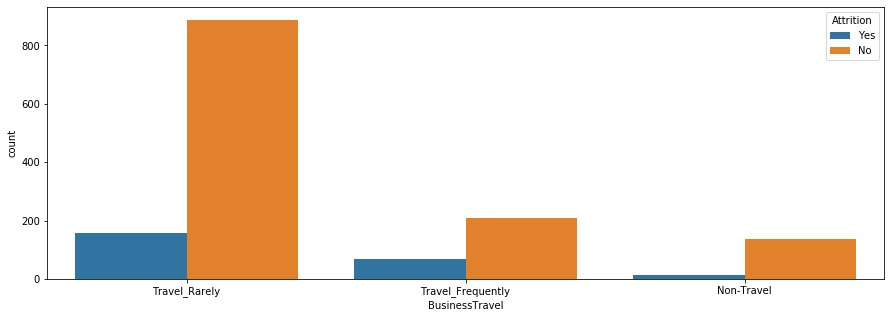

In [68]:
# BusinessTravel
plt.figure(figsize=(15,5))
sns.countplot(df_hr.BusinessTravel,hue=df_hr.Attrition)
# Maximum people travel rarely, a few people Travel Frequently and the least people are non-travelers. 
#Also, Ratio-wise, Frequent Travelers seem to be more likely to leave

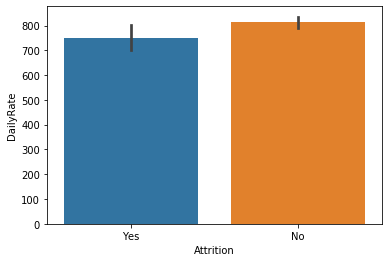

In [69]:
#DailyRate
sns.barplot(y='DailyRate',x='Attrition',data=df_hr)
# average dailr rate of people leaving is less

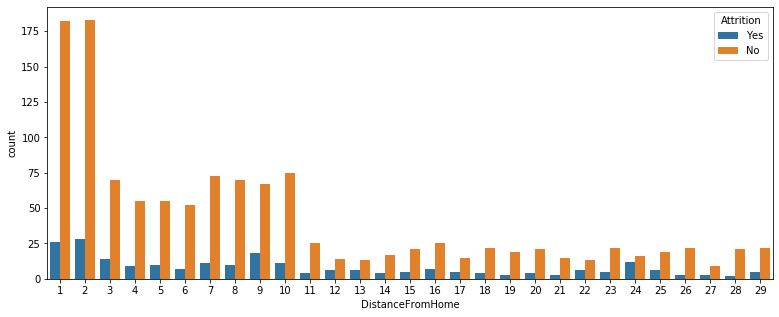

In [70]:
# distance from home
plt.figure(figsize=(13,5))
sns.countplot(df_hr.DistanceFromHome,hue=df_hr.Attrition)
plt.show()

# Most people have Dist. less than 10 (assuming km). Also, at 24, the proprtion is a bit higher than usual

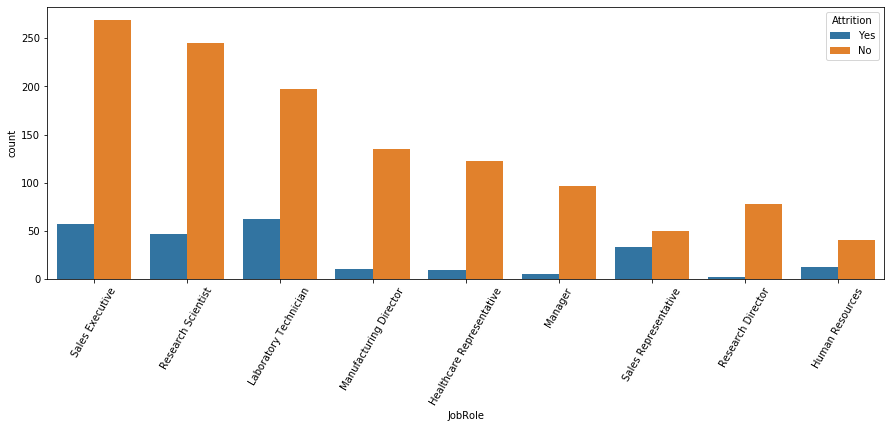

In [71]:
#job role
plt.figure(figsize=(15,5))
sns.countplot("JobRole",data=df_hr,hue="Attrition")
plt.xticks(rotation=60)
plt.show()
#Sales Reps have high rate of Attrition

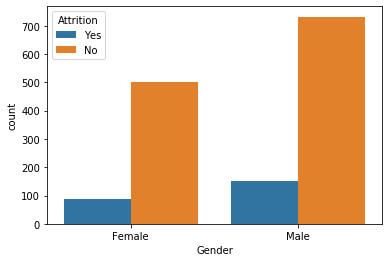

In [72]:
#gender
sns.countplot(x="Gender",data=df_hr,hue="Attrition")
plt.show()
# No evident diffeence in attrition due to gender. 

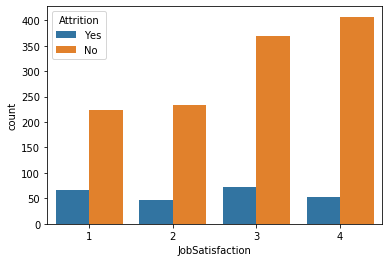

In [73]:
#JobSatisfaction
sns.countplot(x="JobSatisfaction",data=df_hr,hue="Attrition")
plt.show()
# As expected as the job satisfaction scre is high, the attrition rate is lesser

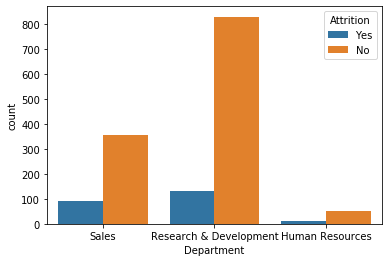

In [74]:
#Department
sns.countplot(x="Department",data=df_hr,hue="Attrition")
plt.show()
# Attrition rate is higher in Sales

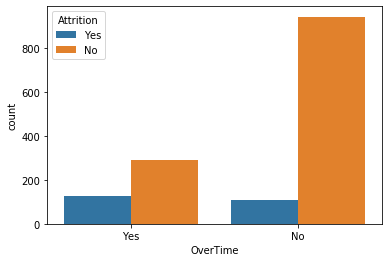

In [75]:
# overtime
sns.countplot(x="OverTime",data=df_hr,hue="Attrition")
plt.show()
#If overtime is there then attrition rate is higher

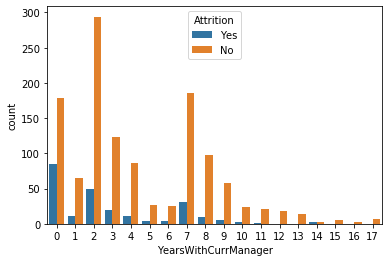

In [76]:
#YearsWithCurrManager
sns.countplot(x="YearsWithCurrManager",data=df_hr,hue="Attrition")
plt.show()

# Attrition rate is higher (Proportion) in the first year itself (If people don't like the manager, they leave in the first year)
# 2 years of working attrition is high, but the proportion is not that high, as overall more people are staying.
# Most employees work with same manager for 2 years (may get prmoted after that), but if they stay, they keep working till 7-8 years


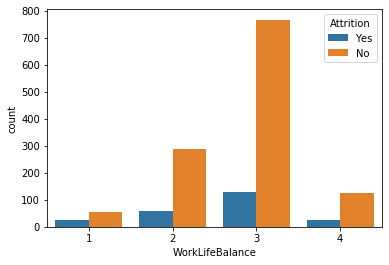

In [77]:
#WorkLifeBalance
sns.countplot(x="WorkLifeBalance",data=df_hr,hue="Attrition")
plt.show()

# As per worklife balance score, 1 and 2 have higher attrition rate, while 3 and 4 have lesser rate.
# Overall most of the employees have scored 3


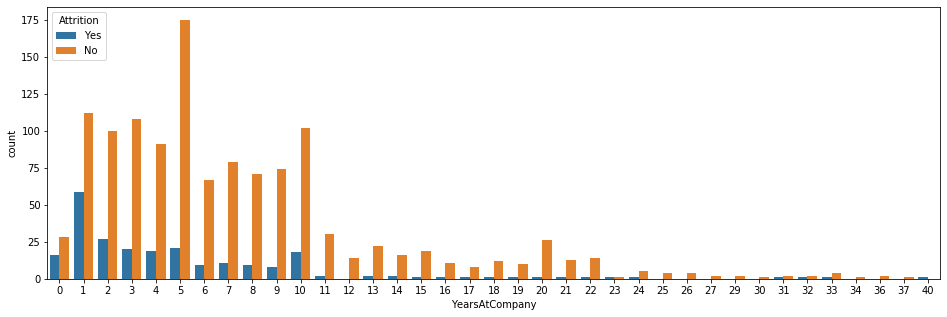

In [78]:
#YearsAtCompany
plt.figure(figsize=(16,5))
sns.countplot(x="YearsAtCompany",data=df_hr,hue="Attrition")
plt.show()

# Maximum people work between 1-10 years i n this company.
# Maximum Attrition rate happens in the first 3 years.
# After 23 attrition rate can be close to 50%
# After 31,32 years, there is high rate of attrition. Maybe people get top Management roles in other companies
# AT 40, again the attrition is very high - this maybe the retirement time

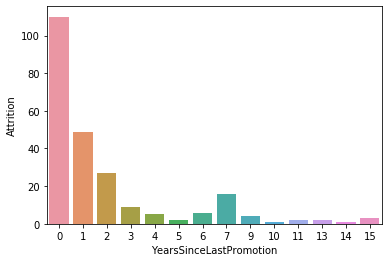

In [79]:
# YearsSinceLastPromotion
grp=df_hr[df_hr["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"}).reset_index()
sns.barplot(data=grp,x='YearsSinceLastPromotion',y='Attrition')

#There's high attrition if people don't get promoted within 1-2 years. Again at 7th year attrition starts geting high.

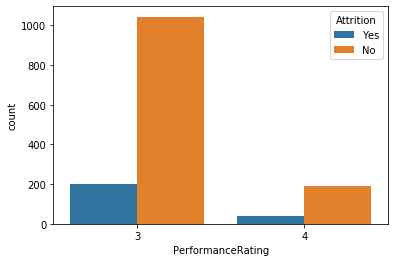

In [80]:
#PerformanceRating
sns.countplot(x="PerformanceRating",data=df_hr,hue="Attrition")
plt.show()
# Those with rating 4 have less attrition

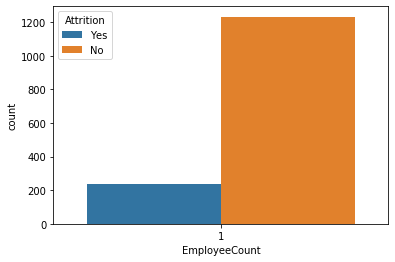

In [81]:
#EmployeeCount
sns.countplot(x="EmployeeCount",data=df_hr,hue="Attrition")
plt.show()

# All values are "1". We can drop this feature

In [82]:
df_hr.drop(columns=["EmployeeCount"],axis=1,inplace=True)

In [83]:
# Let's check for skewness
print(df_hr.skew())
#There is a lot of skewness present in the data. Let's transform them.

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64


In [84]:
import numpy as np
for col in df_hr.columns:
    if df_hr[col].dtypes!="object":
        if df_hr.skew().loc[col]>0.55:
            df_hr[col]=np.log1p(df_hr[col])
        if df_hr.skew().loc[col]<-0.55:
            df_hr[col]=np.square(df_hr[col])
        
df_hr.skew()
# We have successfully removed a lot of skewness

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [85]:
# Let's do Label ecoding for Object datatypes so that we can find correlations.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in df_hr.columns:
    if df_hr[col].dtypes=="object":
        df_hr[col]=le.fit_transform(df_hr[col])
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,1,2,0,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,1,3,1,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,1,2,1373,1,1.098612,2,4,4,1,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,1,4,0,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,0,2,591,1,1.098612,1,3,1,1,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612


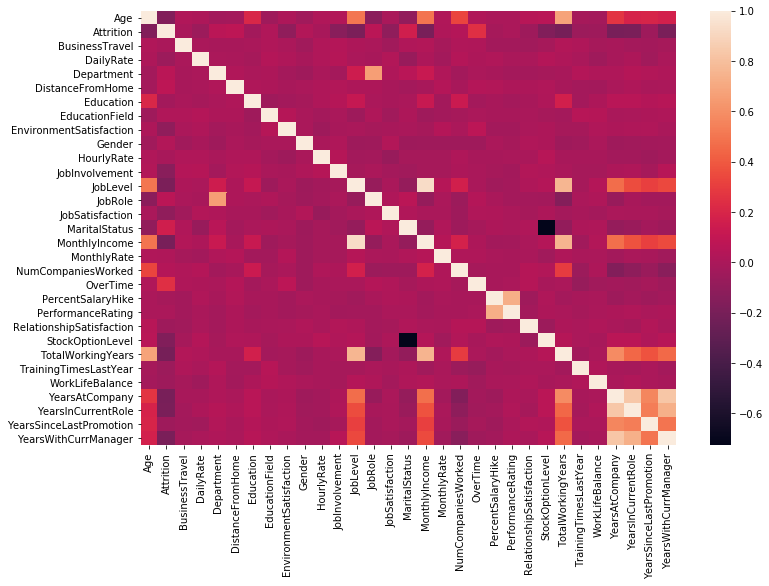

In [86]:
# Let's have a look at the correlation within parameters
plt.figure(figsize=(12,8))
sns.heatmap(df_hr.corr())
plt.show()

In [87]:
# Let's Separate our dataset into Features and target
df_x=df_hr.drop(columns=["Attrition"])
y=df_hr[["Attrition"]]

In [88]:
#Lets scale the parameters
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [141]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [110]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [91]:
# Let's reduce some dimensions with PCA
from sklearn.decomposition import PCA 
for i in range(5,31):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.3911707973686639
6  variance :0.43037803021410426
7  variance :0.4685443438259429
8  variance :0.5053092772392153
9  variance :0.5418916366705798
10  variance :0.5757726820815001
11  variance :0.6117620036287119
12  variance :0.6450489117453401
13  variance :0.6783016337224791
14  variance :0.7106054862809711
15  variance :0.7427552664292378
16  variance :0.7739339310003446
17  variance :0.8043187915757979
18  variance :0.8337636322829193
19  variance :0.8626036205109404
20  variance :0.8905399083176524
21  variance :0.9150743489830384
22  variance :0.9340624498799841
23  variance :0.9514716480530782
24  variance :0.9616422717592414
25  variance :0.9709191789232156
26  variance :0.9797441310990349
27  variance :0.9883228918055179
28  variance :0.9942269530156567
29  variance :0.9977641200461437
30  variance :0.9999999999999999


In [92]:
# We find that after 13 the variance is almost the same so the remaining are redundant. Lets use n_components=13
pca = PCA(n_components=23)
x=pca.fit_transform(x)

In [93]:
x.shape

(1470, 23)

# Objective: Identify Attrition - Yes/No

# Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=max_aucroc_score(lg,x,y)

max auc roc score corresponding to  68  is  0.7305108105779997


# Decision Tree Classifier


In [145]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,x,y)

max auc roc score corresponding to  75  is  0.6824446550090446


75

# Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,50,100,150,200,250,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 150}

In [118]:
rf=RandomForestClassifier(n_estimators=150)
max_aucroc_score(rf,x,y)

max auc roc score corresponding to  43  is  0.6382978723404256


43

# KNN

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(knn, neighbors, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 9}

In [119]:
knn=KNeighborsClassifier(n_neighbors=9)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  96  is  0.5851063829787234


# SVC

In [120]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [121]:
svc=SVC(kernel="linear",C=0.001)
max_aucroc_score(svc,x,y)

max auc roc score corresponding to  42  is  0.5


42

# Gradient Boost

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [127]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
max_aucroc_score(gb_clf,x,y)

max auc roc score corresponding to  97  is  0.7092342148333188


97

# Cross Validation
Let's Cross Validation on Logistic regression, Decision Tree and Random Forestas they gave best score. Then we'll select the best model

In [144]:
print("\n\nLogistic Regression\n\n")
model_evaluation(lg,x,y)


print("\n\nDecision Tree\n\n")
model_evaluation(dc,x,y)

print("\n\nRanfom Forest\n\n")
model_evaluation(rf_clf,x,y)



Logistic Regression


Mean r2 score for regressor:  0.03923632631536933
standard deviation in r2 score for regressor:  0.06884329360801476
[ 0.07876016 -0.02083333 -0.06365751  0.11361874  0.08829357]


Decision Tree


Mean r2 score for regressor:  -0.6250803448683981
standard deviation in r2 score for regressor:  0.05676208610241035
[-0.61839431 -0.56859756 -0.72211215 -0.64613662 -0.57016108]


Ranfom Forest


Mean r2 score for regressor:  -0.09151563267075509
standard deviation in r2 score for regressor:  0.05792476378295177
[-0.17022358 -0.04573171 -0.01300715 -0.08898269 -0.13963304]


# Selecting Decision Tree as the Final Model

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 75,test_size=0.20)
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[208  29]
 [ 35  22]]
f1 score is :  0.40740740740740744
classification report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       237
           1       0.43      0.39      0.41        57

    accuracy                           0.78       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.77      0.78      0.78       294

AUC ROC Score:  0.6318010215411947


In [148]:
from sklearn.externals import joblib
joblib.dump(dc,'Attrition.pkl')

['Attrition.pkl']